# Carnotprozess

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/sgeorg%2Fpython-thermo/HEAD?filepath=Carnotprozess.ipynb)

Für gegebene Randbedingungen wird der Carnotprozess für ein ideales zweiatomiges Gas im p-v- und T-s-Diagramm dargestellt. Es werden Zahlenwerte für die Prozessgrößen (ausgetauschte Wärme *q*, Arbeit *wv* und Entropie *s*), die fehlenden Zustandsgrößen (Druck *p*, Temperatur *T* und spez. Volumen *v*) sowie die Nutzarbeit und der Wirkungsgrad berechnet.

Der Carnotprozess besteht aus vier Zustandsänderungen und läuft wie folgt ab:

* $1 \rightarrow 2$: Isotherme Kompression
* $2 \rightarrow 3$: Isentrope Kompression
* $3 \rightarrow 4$: Isotherme Expansion
* $4 \rightarrow 1$: Isentrope Expansion

Die Zustandspunkte (1) und (3) sind vorgegeben (siehe [Setup](#Setup)).

**Beim erstmaligen starten bitte im Menü auf *Kernel->Restart & Run All* gehen.**

## Setup

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plot
from IPython.display import Markdown, Latex

# Eigenschaften des Fluids
κ = 1.4
Ri = 287.0 # J/kg.K
cp = κ / (κ - 1) * Ri
cv = cp - Ri

# Zustandspunkt (1)
T1 = 293.15 # 20°C
p1 = 1e5 # 1 bar
v1 = (Ri * T1) / p1

# Zustandspunkt (3)
T3 = 473.15 # 200°C
p3 = 20e5 # 20 bar
v3 = (Ri * T3) / p3

## Berechnung der Zustandspunkte

In [2]:
# Zustandspunkt 2
T2 = T1
p2 = p3 * (T2 / T3) ** (κ / (κ - 1))
v2 = (Ri * T2) / p2

# Zustandspunkt 4
T4 = T3
p4 = p1 * (T4 / T1) ** (κ / (κ - 1))
v4 = (Ri * T4) / p4

In [3]:
# Automatische Generierung des nächsten Kapitels 
Markdown(f"""
## Tabelle der Zustandspunkte

|           | (1)           | (2)               | (3)          | (4)              |
|-----------|---------------|-------------------|--------------|------------------|
| T / K     | {T1}          | {T2}              |{T3}          |{T4}              |
| p / bar   | {p1/1e5}      | {round(p2/1e5,4)} |{p3/1e5}      |{round(p4/1e5,4)} |
| v / m³/kg | {round(v1,5)} | {round(v2,5)}     |{round(v3,5)} |{round(v4,5)}     |
""")


## Tabelle der Zustandspunkte

|           | (1)           | (2)               | (3)          | (4)              |
|-----------|---------------|-------------------|--------------|------------------|
| T / K     | 293.15          | 293.15              |473.15          |473.15              |
| p / bar   | 1.0      | 3.7441 |20.0      |5.3417 |
| v / m³/kg | 0.84134 | 0.22471     |0.0679 |0.25421     |


## Berechnung der Prozessgrößen

In [4]:
# Entropie
s1 = 0 # Definiert
s2 = s1 + Ri * np.log(p1 / p2)
s3 = s2
s4 = s3 + Ri * np.log(p3 / p4)
s12 = s2 - s1
s23 = s3 - s2
s34 = s4 - s3
s41 = s1 - s4

# Innere Energie
u1 = 0 # Definiert
u2 = u1
u3 = u2 + cv * (T3 - T2)
u4 = u3
u12 = u2 - u1
u23 = u3 - u2
u34 = u4 - u3
u41 = u1 - u4

# Technische Arbeit
wv12 = -p1 * v1 * np.log(p1 / p2)
wv23 = Ri / (κ - 1) * (T3 - T2)
wv34 = -p3 * v3 * np.log(p3 / p4)
wv41 = Ri / (κ - 1) * (T1 - T4)

# Wärme
q12 = -wv12
q23 = 0
q34 = -wv34
q41 = 0

In [5]:
# Tabelle der Prozessgrößen
Markdown(fr"""
|                | $1 \rightarrow 2$ | $2 \rightarrow 3$ | $3 \rightarrow 4$ | $4 \rightarrow 1$ |
|----------------|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
|Zustandsänderung| Isotherm          | Isentrop&nbsp;    | Isotherm          | Isentrop&nbsp;    |
|Δu / kJ/kg      |{round(u12/1e3,2)} |{round(u23/1e3,2)} |{round(u34/1e3,2)} |{round(u41/1e3,2)} |
|Δs / J/kg.K     |{round(s12,2)}     |{round(s23,2)}     |{round(s34,2)}     |{round(s41,2)}     |
|q / kJ/kg       |{round(q12/1e3,2)} |{round(q23/1e3,2)} |{round(q34/1e3,2)} |{round(q41/1e3,2)} |
|w_v / kJ/kg     |{round(wv12/1e3,2)}|{round(wv23/1e3,2)}|{round(wv34/1e3,2)}|{round(wv41/1e3,2)}|
""")


|                | $1 \rightarrow 2$ | $2 \rightarrow 3$ | $3 \rightarrow 4$ | $4 \rightarrow 1$ |
|----------------|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
|Zustandsänderung| Isotherm          | Isentrop&nbsp;    | Isotherm          | Isentrop&nbsp;    |
|Δu / kJ/kg      |0.0 |129.15 |0.0 |-129.15 |
|Δs / J/kg.K     |-378.89     |0.0     |378.89     |0.0     |
|q / kJ/kg       |-111.07 |0.0 |179.27 |0.0 |
|w_v / kJ/kg     |111.07|129.15|-179.27|-129.15|


## Berechnung von nutzbarer Arbeit und Wirkungsgrad

### Nutzarbeit

Die nutzbare Arbeit berechnet sich aus der Differenz von zu- und abgeführter Arbeit. Durch die Vorzeichenkonvention kann hierbei die Summe aller Arbeiten gebildet werden:

$|w_{nutz}| = |w_{v12}+w_{v23}+w_{v34}+w_{v41}|$

In [6]:
wv_nutz = abs(wv12 + wv23 + wv34 + wv41)
Latex(f'$|w_{{nutz}}| = {round(wv_nutz/1e3,2)} \\frac{{kJ}}{{kg \cdot K}}$')

<IPython.core.display.Latex object>

### Wirkungsgrad

Der Wirkungsgrad berechnet sich allgemein aus dem Verhältnis Nutzen zu Aufwand. In Fall des Carnotprozess ist der Nutzen die nutzbare Arbeit, der Aufwand ist die zugeführte Wärme.

$\eta = \frac{Nutzen}{Aufwand} = \frac{|w_{nutz}|}{q_{34}}$

In [7]:
η = wv_nutz / q34
Latex(f'$\eta = {round(η*100,2)}\%$')

<IPython.core.display.Latex object>

Speziell für den Carnot-Prozess kann auch die Formel

$\eta_c = 1 - \frac{T1}{T3}$

genutzt werden.

In [8]:
η_c = 1 - T1/T3
Latex(f'$\eta_c = {round(η_c*100,2)}\%$')

<IPython.core.display.Latex object>

## p-v-Diagramm

<IPython.core.display.Javascript object>


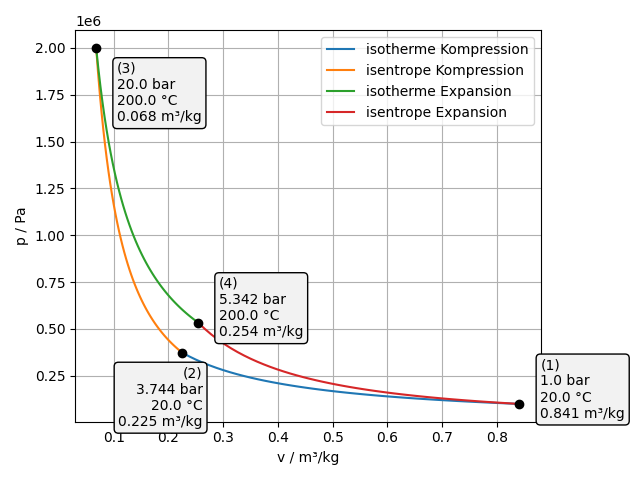

In [9]:
# Hilfsfunktionen
def vv(a, b): return np.linspace(a, b)
def p(v, n, T0, v0): return (Ri * T0) / (v0 * (v / v0) ** n)
def ϑ(T): return T - 273.15

# Allgemeine Einstellungen für Beschriftungen
text_offset = {'textcoords': 'offset points', 'xytext': (15, -10), 'bbox': {'boxstyle': 'round', 'fc': '0.95'}}

# p-v-Diagramm
pv, ax = plot.subplots()
ax.plot(vv(v1, v2), p(vv(v1, v2), 1, T1, v1), label='isotherme Kompression')
ax.plot(vv(v2, v3), p(vv(v2, v3), κ, T2, v2), label='isentrope Kompression')
ax.plot(vv(v3, v4), p(vv(v3, v4), 1, T3, v3), label='isotherme Expansion')
ax.plot(vv(v4, v1), p(vv(v4, v1), κ, T4, v4), label='isentrope Expansion')
ax.plot([v1, v2, v3, v4], [p1, p2, p3, p4], 'ko')
ax.annotate(f'(1)\n{round(p1/1e5,3)} bar\n{round(ϑ(T1),3)} °C\n{round(v1,3)} m³/kg', (v1, p1), **text_offset)
ax.annotate(f'(2)\n{round(p2/1e5,3)} bar\n{round(ϑ(T2),3)} °C\n{round(v2,3)} m³/kg', (v2, p2), **text_offset, va='top', ha='right')
ax.annotate(f'(3)\n{round(p3/1e5,3)} bar\n{round(ϑ(T3),3)} °C\n{round(v3,3)} m³/kg', (v3, p3), **text_offset, va='top')
ax.annotate(f'(4)\n{round(p4/1e5,3)} bar\n{round(ϑ(T4),3)} °C\n{round(v4,3)} m³/kg', (v4, p4), **text_offset)
ax.set_xlabel('v / m³/kg')
ax.set_ylabel('p / Pa')
ax.legend()
ax.grid()
pv.tight_layout()

## T-s-Diagramm

<IPython.core.display.Javascript object>


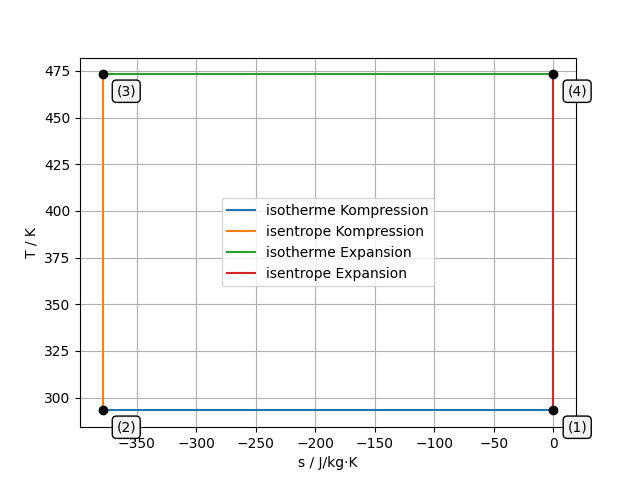

In [10]:
# Allgemeine Einstellungen für Beschriftungen
text_offset = {'textcoords': 'offset points', 'xytext': (10, -15), 'bbox': {'boxstyle': 'round', 'fc': '0.95'}}

# T-s-Diagramm
# Der Carnotprozess besteht im T-s-Diagramm nur aus Geraden,
# wesshalb die Plots mit einfachen Werte-Paaren statt mit
# Achsen erstellt werden können
Ts, ax = plot.subplots()
ax.plot([s1, s2], [T1, T2], label='isotherme Kompression')
ax.plot([s2, s3], [T2, T3], label='isentrope Kompression')
ax.plot([s3, s4], [T3, T4], label='isotherme Expansion')
ax.plot([s4, s1], [T4, T1], label='isentrope Expansion')
ax.plot([s1, s2, s3, s4], [T1, T2, T3, T4], 'ko')
ax.annotate('(1)', (s1, T1), **text_offset)
ax.annotate('(2)', (s2, T2), **text_offset)
ax.annotate('(3)', (s3, T3), **text_offset)
ax.annotate('(4)', (s4, T4), **text_offset)
ax.set_xlabel('s / J/kg·K')
ax.set_ylabel('T / K')
ax.legend()
ax.grid()
pv.tight_layout()